In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data , iris.target, test_size= 0.2, random_state=2)


In [9]:
def eucledian(x1,x2):
    return np.sqrt(np.sum(x1-x2)**2)


def KNN(X_train,X_test, y_train, k):
  y_pred = []
  for test_point in X_test:
    dist = [eucledian(test_point, train_point) for train_point in X_train]
    k_sorted = np.argsort(dist)[:k]
    k_labels = [y_train[i] for i in k_sorted]
    most_common = max(set(k_labels), key = k_labels.count)
    y_pred.append(most_common)
  return np.array(y_pred)

In [10]:
k =3
y_pred= KNN(X_train, X_test, y_train, k)


In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9


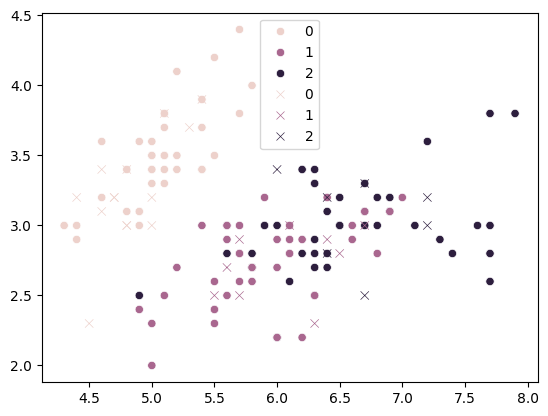

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt  # Corrected import statement

# Scatter plot for training data
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)

# Scatter plot for test data with predicted classes marked with 'x'
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, marker="x")

plt.show()  # Corrected syntax


In [23]:
X= iris.data
y = iris.target
cov_matrix = np.cov(X, rowvar = False)
eigenvalues , eigenvectors = np.linalg.eig(cov_matrix)

eigen_sorted = np.argsort(eigenvalues)[::-1]
sorted_eigen_vectors = eigenvalues[eigen_sorted]
sorted_eigen_vectors = eigenvectors[:,eigen_sorted]
k = 2
p_comp = sorted_eigen_vectors[:,k]


In [24]:
X_pca = np.dot(X,p_comp)
X_train,X_test, y_train , y_test = train_test_split(X_pca , y , test_size = 0.2 , random_state=2)


In [28]:
from sklearn import LogisticRegression
model = LogisticRegression()
y_pred = model.fit(X_train,y_train)
accuracy = accuracy_score(y_test, y_pred)

ImportError: cannot import name 'LogisticRegression' from 'sklearn' (c:\Users\Deepthi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\__init__.py)